# 시계열 수치입력 수치 예측 모델
- 시계열 수치를 입력해서 다음 수치를 예측하는 모델
- 각 모델에 코사인(cosine) 데이터를 학습시킨 후, 처음 일부 데이터를 알려주면 이후 코사인 형태의 데이터 예측을 얼마나 잘 하는 지 테스트

### 코사인 데이터를 만들기 
- 시간의 흐름에 따라 진폭이 -1.0에서 1.0사이로 변하는 1,600개의 실수값을 생성

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

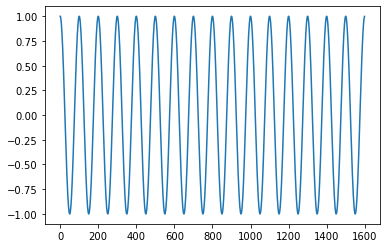

In [7]:
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

#### 데이터셋 만들기 
- 생성한 코사인 데이터를 모델에 학습시키기 위해서는 데이터와 라벨로 구성된 데이터셋으로 만들기 
- 이전 수치들을 입력하여 다음 수치를 예측하는 문제
    - 데이터는 이전 수치
    - 라벨은 다음 수치
- 다른 예제들과는 달리 데이터와 라벨이 모두 같은 속성
- create_dataset() 함수는 시계열 수치를 입력받아 데이터셋을 생성
    - look_back 인자는 얼마만큼의 이전 수치를 데이터로 만들것인가를 결정

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### 데이터 분리 
- -1.0에서 1.0까지의 값을 가지는 코사인 데이터를 0.0과 1.0 사이의 값을 가지도록 정규화를 한 뒤 훈련셋과 시험셋으로 분리
- 이전 40개의 수치를 입력하여 다음 수치 1개를 예측하는 데이터셋을 만들기 위해 look_back 인자를 40으로 설정
    -look_back 인자에 따라 모델의 성능이 달라지므로 적정 값을 지정하는 것이 중요

In [10]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

### 레이어 준비 
- LSTM 
    - Long-Short Term Memory unit의 약자로 순환 신경망 레이어 중 하나
- tanh
    - LSTM의 출력 활성화 함수로 사용